In [15]:
import pandas as pd
import numpy as np
import nibabel as nib

from production.main_function import align_to_template_w_intens, rotate_axial_slices

In [16]:
# loading original data

test_img = nib.load('../data/raw-data/Yagishita_Sharapova_20230818_HF3_G1_.nii')
test_data_img = test_img.get_fdata()

In [17]:
test_img.shape

(128, 160, 96)

In [18]:
np.max(test_data_img)

872.2046351395547

In [19]:
print(test_img.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 16384
session_error   : 0
regular         : b'r'
dim_info        : 54
dim             : [  3 128 160  96   0   0   0   0]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.  0.1 0.1 0.1 0.  0.  0.  0. ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 95
slice_code      : unknown
xyzt_units      : 2
cal_max         : 32766.0
cal_min         : 6.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 32767
glmin           : -32768
descrip         : b'Yagishita-Sharapova/20230818_hf3-g1-icr-/8/1'
aux_file        : b''
qform_code      : scanner
sform_code      : unknown
quatern_b       : -0.70710677
quatern_c       : -2.1648902e-17
quatern_d       : -2.1648902e-17
qoffset_x       : -6.

In [20]:
# loading template data

average_img_template = nib.load('data/AverageT2 (1).nii')
data_average_template = average_img_template.get_fdata()

In [21]:
average_img_template.shape

(111, 156, 86)

In [22]:
np.max(data_average_template)

6114.71337890625

In [23]:
print(average_img_template.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 111 156  86   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.  1.  1.  1.  0.  0.  0.  0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'mean image'
aux_file        : b''
qform_code      : aligned
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 55.0
qoffset_y       : -95.0
qoffset_z       : -75.0
srow_x          : [-1.  0.  0.

In [24]:
aligned_test_data, test_header = align_to_template_w_intens(test_data_img, test_img.header, average_img_template.header)
aligned_img_test = nib.Nifti1Image(aligned_test_data, None, header=test_header)

nib.save(aligned_img_test, 'data/after_affine/after_transformations_v2_v2_v3.nii')

# Above works and it does what it suppose to do, however the issue is axial slise is not rotated to 90 degree


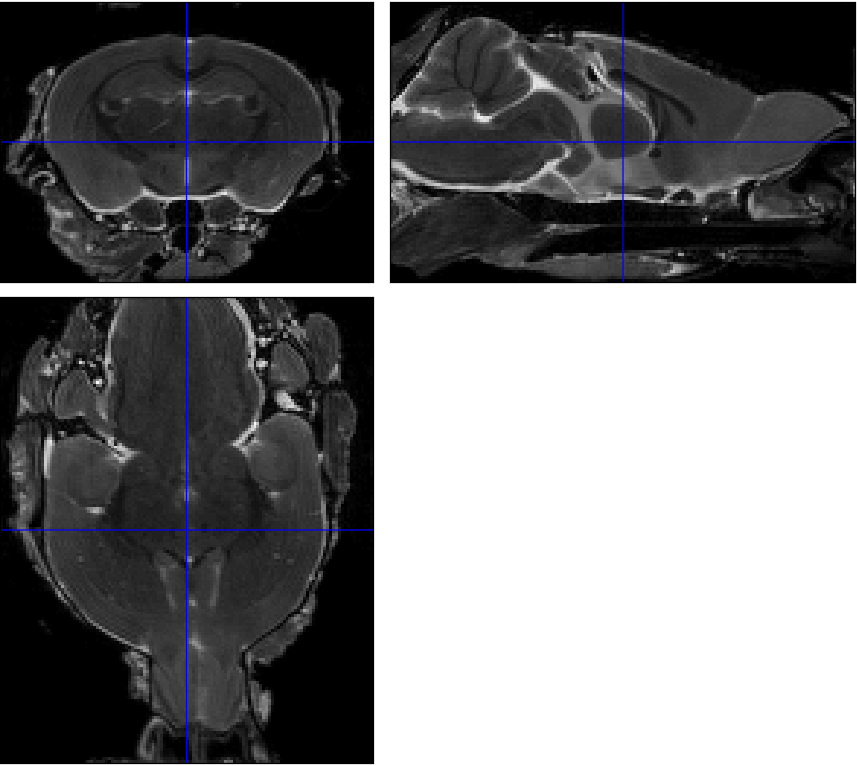

In [25]:
# imporing rotation function

rotated_aligned_img_data = rotate_axial_slices(aligned_test_data)

In [14]:
# saving rotation function

rotated_aligned_img = nib.Nifti1Image(rotated_aligned_img_data, None, header=test_header)

nib.save(rotated_aligned_img, 'data/after_affine/after_transformations_rotated_v1000.nii')

# Checking headr information

In [12]:
loaded_img = nib.load('data/after_affine/after_transformations_rotated.nii')
loaded_img_data = loaded_img.get_fdata()

In [18]:
loaded_img.shape

(128, 160, 96)

In [19]:
np.max(loaded_img_data)

872.2046499904245

In [30]:
print(loaded_img.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 16384
session_error   : 0
regular         : b'r'
dim_info        : 54
dim             : [  3 128 160  96   0   0   0   0]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.  0.1 0.1 0.1 0.  0.  0.  0. ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 95
slice_code      : unknown
xyzt_units      : 2
cal_max         : 32766.0
cal_min         : 6.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 32767
glmin           : -32768
descrip         : b'Yagishita-Sharapova/20230818_hf3-g1-icr-/8/1'
aux_file        : b''
qform_code      : aligned
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 55.0
qoffset_y       : -95.0
qoff

In [31]:
other_img = nib.load('data/T2_UT224.nii')
other_img_data = other_img.get_fdata()

In [33]:
np.max(other_img_data)

652.9016149006784

In [35]:
print(other_img.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 16384
session_error   : 0
regular         : b'r'
dim_info        : 54
dim             : [  3 128 160  96   0   0   0   0]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.  0.1 0.1 0.1 0.  0.  0.  0. ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 95
slice_code      : unknown
xyzt_units      : 2
cal_max         : 32766.0
cal_min         : 3.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 32767
glmin           : -32768
descrip         : b'Keio_Abeyoshifumi/20221216_UT224_ctl/4/4'
aux_file        : b''
qform_code      : scanner
sform_code      : aligned
quatern_b       : -0.70710677
quatern_c       : -2.1648902e-17
quatern_d       : 2.1648902e-17
qoffset_x       : -7.20760

In [32]:
other_img_data.shape

(128, 160, 96)

In [ ]:
other_img = nib.load('data/T2_UT224.nii')
other_img_data = other_img.get_fdata()

In [36]:
def load(path):
    other_img = nib.load(path)
    other_img_data = other_img.get_fdata()
    return other_img, other_img_data

In [37]:
img, img_data = load('data/Yagishita_Sharapova_20230817_HF2_S4_icr_t2only.nii')

In [39]:
print(img.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 16384
session_error   : 0
regular         : b'r'
dim_info        : 54
dim             : [  3 128 160  96   0   0   0   0]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.  0.1 0.1 0.1 0.  0.  0.  0. ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 95
slice_code      : unknown
xyzt_units      : 2
cal_max         : 32766.0
cal_min         : 5.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 32767
glmin           : -32768
descrip         : b'Yagishita-Sharapova/20230817_hf2-s4-icr-t2only/4/4'
aux_file        : b''
qform_code      : scanner
sform_code      : unknown
quatern_b       : -0.70710677
quatern_c       : -2.1648902e-17
quatern_d       : -2.1648902e-17
qoffset_x      